In [21]:
FILE_PATH = '../data/ehresp_2014.xlsx'

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ehresp_2014 DataFrame
ehresp_2014 = pd.read_excel(FILE_PATH)

numerical_columns = ['ertpreat', \
                     'ertseat', \
                     'euexfreq', \
                     'eufastfdfrq', \
                     'euhgt', \
                     'euwgt']

categorical_columns = ['eeincome1', \
                       'erhhch', \
                       'erincome', \
                       'erspemch', \
                       'ethgt', \
                       'etwgt', \
                       'eudietsoda', \
                       'eudrink', \
                       'eueat', \
                       'euexercise', \
                       'eufastfd', \
                       'euffyday', \
                       'eufdsit', \
                       'eusnap', \
                       'eugenhth', \
                       'eugroshp', \
                       'euinclvl', \
                       'euincome2', \
                       'eumeat', \
                       'eumilk', \
                       'euprpmel', \
                       'eusoda', \
                       'eustores', \
                       'eustreason', \
                       'eutherm', \
                       'euwic']

target_column = ['erbmi']

In [22]:
dataset = ehresp_2014.copy()

In [23]:
dataset.head()

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
0,20140101140007,1,-2,33.200001,1,-1,-1,30,2,0,...,1,2,1,-1,2,1,2,170,1,2
1,20140101140011,1,1,22.700001,3,1,-1,45,14,0,...,1,2,1,-1,1,2,2,128,2,0
2,20140101140028,1,2,49.400002,3,5,-1,60,0,0,...,-1,-1,2,2,-1,-1,-1,270,2,12
3,20140101140063,1,-2,-1.000000,3,-1,-1,0,0,0,...,2,2,1,1,2,6,-1,-2,2,2
4,20140101140168,1,2,31.000000,3,5,-1,65,0,0,...,1,2,1,2,1,1,2,210,1,0


In [24]:
dataset[numerical_columns].head()

,ertpreat,ertseat,euexfreq,eufastfdfrq,euhgt,euwgt
0,30,2,-1,-1,60,170
1,45,14,-1,1,63,128
2,60,0,-1,-1,62,270
3,0,0,-1,-1,64,-2
4,65,0,5,-1,69,210


In [25]:
dataset[numerical_columns].describe()

,ertpreat,ertseat,euexfreq,eufastfdfrq,euhgt,euwgt
count,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000
mean,65.678113,16.759900,2.236621,1.132804,65.628255,168.182572
std,48.080541,50.643598,3.282512,2.485912,9.144713,56.893436
min,0.000000,-3.000000,-3.000000,-2.000000,-3.000000,-5.000000
25%,30.000000,0.000000,-1.000000,-1.000000,63.000000,140.000000
50%,60.000000,3.000000,2.000000,1.000000,66.000000,168.000000
75%,90.000000,15.000000,4.000000,2.000000,70.000000,200.000000
max,508.000000,990.000000,38.000000,21.000000,77.000000,340.000000


In [26]:
dataset[categorical_columns].describe()

,eeincome1,erhhch,erincome,erspemch,ethgt,etwgt,eudietsoda,eudrink,eueat,euexercise,...,euinclvl,euincome2,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwic
count,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,...,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000
mean,1.293525,2.885212,2.036479,1.872547,-0.003122,-0.031127,-0.286657,1.325901,1.432215,1.353104,...,5.176597,-0.231270,0.529344,1.157867,1.464592,0.738494,0.788887,1.366572,0.844006,0.512130
std,0.845532,0.443716,1.694437,2.915099,0.182376,0.256594,1.204557,0.480756,0.560614,0.548354,...,0.381344,1.452464,0.985731,1.338405,0.691768,1.285256,1.301327,1.872375,1.408404,1.481951
min,-3.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,5.000000,-3.000000,-2.000000,-3.000000,-3.000000,-2.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,1.000000,3.000000,1.000000,-1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,...,5.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,...,5.000000,-1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,2.000000,3.000000,3.000000,5.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,...,5.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,6.000000,3.000000,2.000000,2.000000,3.000000,2.000000,5.000000,6.000000,2.000000,2.000000


In [27]:
dataset[target_column].describe()

,erbmi
count,11212.000000
mean,26.291250
std,8.737788
min,-1.000000
25%,23.000000
50%,26.500000
75%,30.400000
max,73.599998


In [28]:
def get_bmi_class(bmi):
    if bmi < 0:
        return 'Invalid'
    elif bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    elif bmi >= 30:
        return 'Obese'
    else:
        return 'Unknown'

In [29]:
dataset[target_column].head()

,erbmi
0,33.200001
1,22.700001
2,49.400002
3,-1.000000
4,31.000000


## BMI

In [30]:
bmi_class_array = np.asarray(pd.Series(get_bmi_class(bmi) for bmi in dataset[target_column].values))
bmi_class = pd.DataFrame(bmi_class_array, columns=["bmi"])
bmi_class["bmi"].value_counts()

Overweight     3726
Normal         3601
Obese          3128
Invalid         575
Underweight     182
Name: bmi, dtype: int64

In [31]:
dataset_bmi_class = dataset.copy()

dataset_bmi_class['erbmi'] = np.asarray(pd.Series(get_bmi_class(bmi) for bmi in dataset_bmi_class[target_column].values))
dataset_bmi_class.head()

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
0,20140101140007,1,-2,Obese,1,-1,-1,30,2,0,...,1,2,1,-1,2,1,2,170,1,2
1,20140101140011,1,1,Normal,3,1,-1,45,14,0,...,1,2,1,-1,1,2,2,128,2,0
2,20140101140028,1,2,Obese,3,5,-1,60,0,0,...,-1,-1,2,2,-1,-1,-1,270,2,12
3,20140101140063,1,-2,Invalid,3,-1,-1,0,0,0,...,2,2,1,1,2,6,-1,-2,2,2
4,20140101140168,1,2,Obese,3,5,-1,65,0,0,...,1,2,1,2,1,1,2,210,1,0


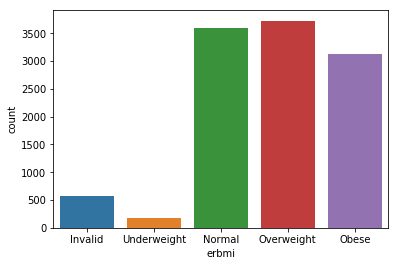

In [32]:
sns.countplot(dataset_bmi_class['erbmi'],
              order=['Invalid', 'Underweight', 'Normal', 'Overweight', 'Obese']
             )

plt.show()

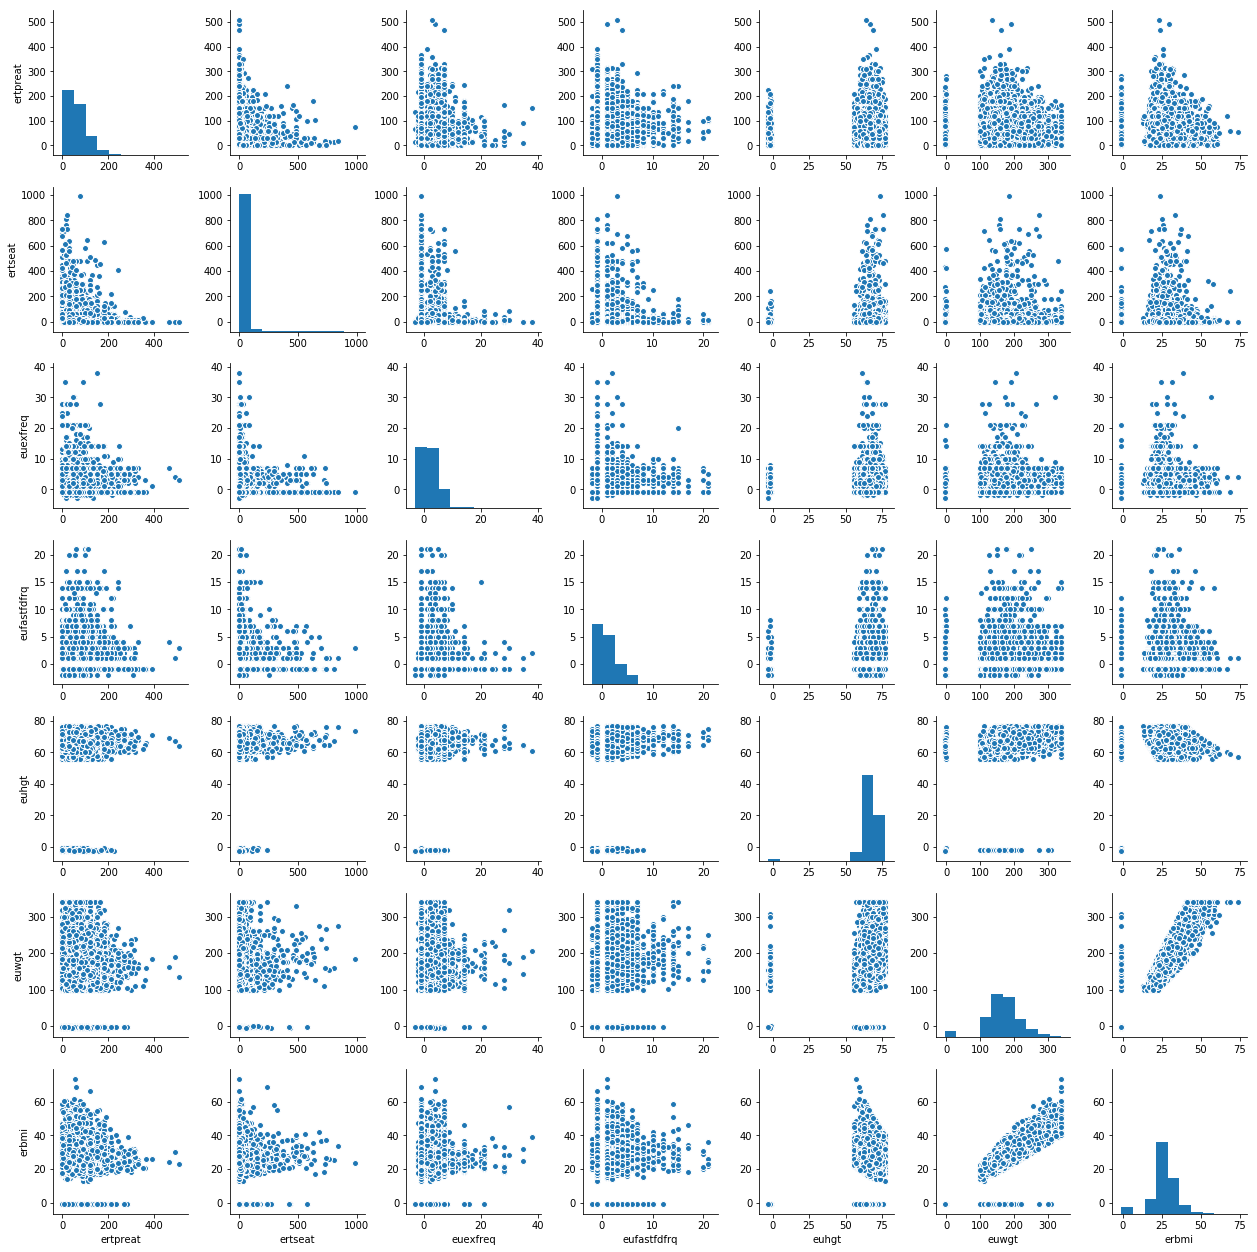

In [33]:
columns = numerical_columns + target_column
columns
sns_plot = sns.pairplot(dataset[columns])
plt.show()

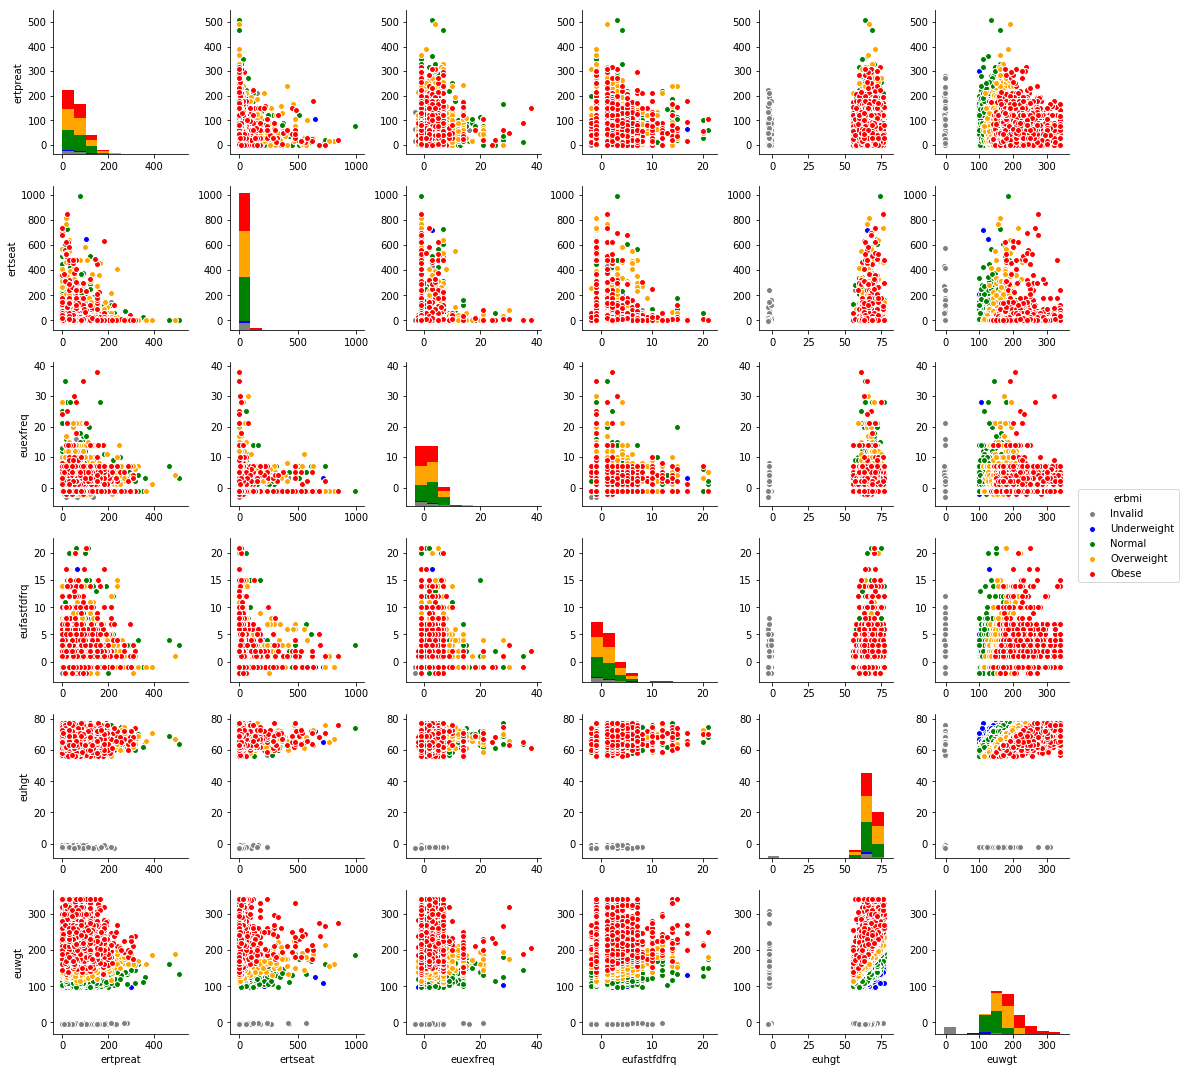

In [34]:
palette = {
    'Invalid': 'grey',
    'Underweight': 'blue',
    'Normal': 'green',
    'Overweight': 'orange',
    'Obese': 'red'
}

columns = numerical_columns + target_column
columns
sns_plot = sns.pairplot(dataset_bmi_class[columns],
                        hue='erbmi',
                        palette=palette,
                        hue_order=['Invalid', 'Underweight', 'Normal', 'Overweight', 'Obese']
                       )
plt.show()
sns_plot.savefig("img/numerical-columns-by-bmi-class.png")

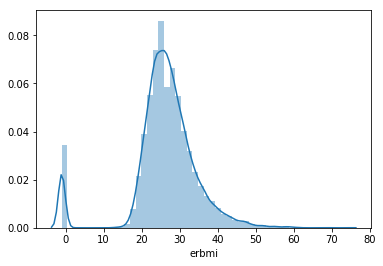

In [35]:
sns.distplot(dataset['erbmi'])
plt.show()

In [36]:
dataset[target_column[0]].loc[dataset[target_column[0]] < 0].value_counts()

-1.0    575
Name: erbmi, dtype: int64